In [1]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/lutzhamel/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)      # add home folder to module search path

Already up to date.


In [2]:
# format output from library calls
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})

# Evaluating Models

## Learning Curves

Learning curves illustrate the general trends of learners. If we train and test models using **training data** and then apply the model
to a **test data set** then we obtain these following typical curves:


    



<!-- ![model curves](assets/model-performance-curves.png) -->

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/train-test-curves.png"  height="300" width="450">

Note: Test data is data that the model has not seen yet as part of its training.


It can be shown that any model can learn its training data perfectly - “memorize it”.  That is what the blue curve shows above. Any model can achieve a perfect score on the training data as long as it is allowed to be complex enough. Maximum complexity: the model has memorized the entire dataset.

But memorizing is not the same as learning inherent patterns and use those patterns to make predictions!  Memorization is extremely bad at predicting labels for data that it hasn't seen yet.  See what happens to the red line below as the model starts to memorize the training dataset -- the score on the test dataset actually falls,

> **We say: Memorization does not generalize well!**

Simply put:

1. Undertrained models (low complexity models) make a lot of errors on test data because they have not learned any of the patterns yet.

2. Overtrained models (high complexity models) make a lot of errors on test data because memorization is extremely bad at predicting labels on data they haven't been trained on.

3. The best models make a trade-off between errors and recognizing important patterns. **Notice that for the best models the training score is not 100%!**



> **Observation**: In order to find the **best model** we have to **search its parameter space** to find just the right complexity level.

**Note**: The code in this notebook takes advantage of the `random_state` parameter in a lot of scikit-learn functions.  This is only done to keep the results of this notebook deterministic.  This variable is strictly not necessary in general applications.

# Train and Test

In order to simulate the fact that a model is not able to see all possible data points during training we split our training data into two parts:

* Training data
* Testing data

We will train our model on the training data as before but we will now test the model performance on the testing data which the model has not seen yet.

> We force the model to make some generalizations. That is, we apply the model to data that it hasn't seen yet.



Let's see if we can observe this learning behavior in decision trees.  We apply decision tree models to two different datasets where we build models of different complexities.  

The following is the block of imports that we need for our model building.

In [3]:
import pandas as pd
from treeviz import tree_print
from sklearn import tree
from sklearn.metrics import accuracy_score
# sklearn provides manipulation of training sets
# here we do a train/test split
from sklearn.model_selection import train_test_split

**Note**: For the remainder of this notebook we will give the accuracy as a fractional value rather than a percentage value.  You can easily recover the percentage value by multiplying the fractional value by 100%.

### The Iris Dataset

We start with the iris dataset.  We would expect a lower accuracy from both the low-complexity and high-complexity models compared to a medium-complexity model which most likely would be close to the ideal model.


In [4]:
# set up our sklearn data shape for the iris data
df = pd.read_csv(home+"iris.csv")
X  = df.drop(columns=['id','Species'])
y = df[['Species']]

# split the data - 70% training 30% testing
(X_train, X_test, y_train, y_test) = \
    train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=2)

#### Low Complexity Tree

Here we limit the depth of decision tree to 1.

In [5]:
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if Petal.Length =< 2.350000023841858: 
  |then setosa
  |else virginica
<->
Tree Depth:  1
Train Accuracy: 0.67
Test Accuracy: 0.67


Limiting the tree depth to 1 implies that we can only have a single if-then-else structure as the model.  That means the model can only discriminate between two alternatives.  However, our data has three labels. Consequently, the points of one of the labels will be misclassified.  Interestingly enough, this shows up in the accuracy scores: Only roughly two thirds of the data points are classified correctly and one third is misclassified.  Looking at the model itself we see that it discriminates between `setosa` and `virginica` implying that it misclassifies points with the label `versicolor`.

Below is the data visualization of the model and it is clear that `versicolor` is being misclassified as `virginica`.


<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

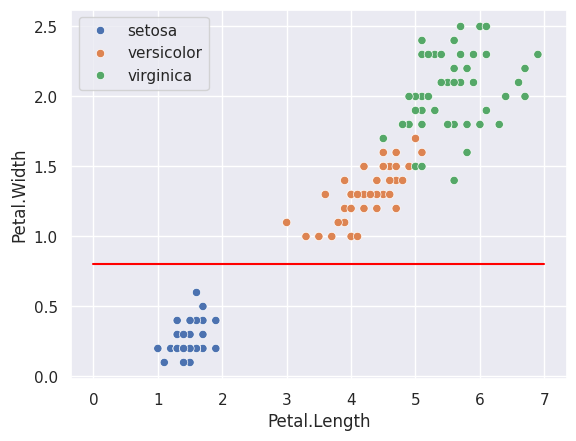

In [6]:
import seaborn as sns
sns.set()

# plot flower data
sns.scatterplot(df, x='Petal.Length', y='Petal.Width', hue='Species')

# plot the model
# if Petal.Width =< 0.8 then setosa else virginica
sns.lineplot(x=[0,7.0], y=[0.8,0.8], color='red')


#### Medium Complexity Tree

Here we limit the depth of the decision tree to 3.

In [7]:
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if Petal.Width =< 0.800000011920929: 
  |then setosa
  |else if Petal.Width =< 1.6500000357627869: 
  |  |then if Petal.Length =< 4.950000047683716: 
  |  |  |then versicolor
  |  |  |else virginica
  |  |else if Petal.Length =< 4.8500001430511475: 
  |  |  |then virginica
  |  |  |else virginica
<------->
Tree Depth:  3
Train Accuracy: 0.98
Test Accuracy: 0.98


The last branch of the above tree can be rewritten as follows:
```
if Petal.Length =< 2.350000023841858:
  |then setosa
  |else if Petal.Width =< 1.6500000357627869:
  |  |then if Petal.Length =< 4.950000047683716:
  |  |  |then versicolor
  |  |  |else virginica
  |  |else virginica
```
Since this tree only uses two variables we can plot the data visualization of the model.  

<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

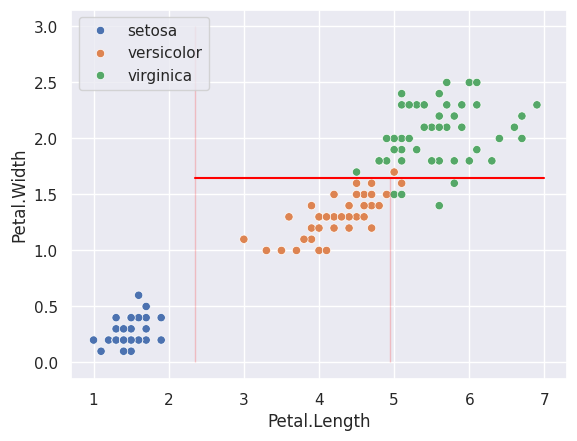

In [8]:
import seaborn as sns
sns.set()

# plot flower data
sns.scatterplot(df, x='Petal.Length', y='Petal.Width', hue='Species')

# plot the decision surfaces
sns.lineplot(x=[2.35,2.35], y=[0,3], color='red')
sns.lineplot(x=[2.35,7.0], y=[1.65,1.65], color='red')
sns.lineplot(x=[4.95,4.95], y=[0,1.65], color='red')


#### High Complexity Tree

Here we do not place any limits on the structure of the decision tree.

In [9]:
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if Petal.Length =< 2.350000023841858: 
  |then setosa
  |else if Petal.Width =< 1.6500000357627869: 
  |  |then if Petal.Length =< 4.950000047683716: 
  |  |  |then versicolor
  |  |  |else if Petal.Width =< 1.550000011920929: 
  |  |  |  |then virginica
  |  |  |  |else versicolor
  |  |else if Petal.Length =< 4.8500001430511475: 
  |  |  |then if Sepal.Width =< 3.100000023841858: 
  |  |  |  |then virginica
  |  |  |  |else versicolor
  |  |  |else virginica
<---------->
Tree Depth:  4
Train Accuracy: 1.00
Test Accuracy: 0.96


We cannot plot this model in 2 dimensions because it uses three variables.  But we can see that it memorizes it training data.

#### Observations

Sure enough, if we look at the **test accuracy** of the three different models,

* low-complexity model: 0.67
* medium-complexity model: 0.98
* high-complexity model: 0.96

We see that the model performance behaves exactly as predicted by the learning curves above: The best model performance is by the medium-complexity model!
The **training accuracy** also behaves as predicted: the most complex model simply memorizes the dataset,

* low-complexity model: 0.67
* medium-complexity model: 0.98
* high-complexity model: 1.00


### Wisconsin Breast Cancer Dataset

Let's try this again with a slightly larger datasest. This data set is available at <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI</a>.
The data set describes benign and malignent tumors based on image measurements.

In [10]:
# set up our sklearn data shape for the iris data
df = pd.read_csv(home+"wdbc.csv")
print(df.shape)
df.head()

(569, 32)


,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,3,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,4,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,5,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [11]:
# see if our data set is balanced
df[['Diagnosis']].value_counts()

Diagnosis
B            357
M            212
dtype: int64

In [12]:
# set up our various datasets
X  = df.drop(columns=['ID','Diagnosis'])
y = df[['Diagnosis']]

# split the data
(X_train, X_test, y_train, y_test) = \
    train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

#### Low Complexity Tree

Limit the model to a depth of 1.

In [13]:
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if perimeter3 =< 104.10000228881836: 
  |then B
  |else M
<->
Tree Depth:  1
Train Accuracy: 0.94
Test Accuracy: 0.85


#### Medium Complexity Tree

Limit the model to a depth of 4.

In [14]:
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=2)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if perimeter3 =< 104.10000228881836: 
  |then if concave_points3 =< 0.13505000621080399: 
  |  |then if area2 =< 48.97500038146973: 
  |  |  |then B
  |  |  |else if concavity2 =< 0.01723999995738268: 
  |  |  |  |then M
  |  |  |  |else B
  |  |else if texture3 =< 29.454999923706055: 
  |  |  |then B
  |  |  |else M
  |else if concave_points3 =< 0.14159999787807465: 
  |  |then if texture3 =< 19.90999984741211: 
  |  |  |then B
  |  |  |else if area2 =< 35.290000915527344: 
  |  |  |  |then B
  |  |  |  |else M
  |  |else if radius3 =< 15.87000036239624: 
  |  |  |then if smoothness3 =< 0.1388000026345253: 
  |  |  |  |then B
  |  |  |  |else M
  |  |  |else M
<---------->
Tree Depth:  4
Train Accuracy: 0.98
Test Accuracy: 0.92


#### High Complexity Tree

Unlimited model complexity.

In [15]:
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if perimeter3 =< 104.10000228881836: 
  |then if concave_points3 =< 0.13505000621080399: 
  |  |then if area2 =< 48.97500038146973: 
  |  |  |then B
  |  |  |else if smoothness3 =< 0.10676500201225281: 
  |  |  |  |then B
  |  |  |  |else M
  |  |else if texture3 =< 29.454999923706055: 
  |  |  |then B
  |  |  |else M
  |else if concave_points3 =< 0.14159999787807465: 
  |  |then if texture3 =< 19.90999984741211: 
  |  |  |then B
  |  |  |else if radius2 =< 0.37575000524520874: 
  |  |  |  |then if perimeter2 =< 2.0149999856948853: 
  |  |  |  |  |then if concave_points3 =< 0.08526499941945076: 
  |  |  |  |  |  |then B
  |  |  |  |  |  |else M
  |  |  |  |  |else B
  |  |  |  |else M
  |  |else if radius3 =< 15.87000036239624: 
  |  |  |then if smoothness3 =< 0.1388000026345253: 
  |  |  |  |then B
  |  |  |  |else M
  |  |  |else M
<---------------->
Tree Depth:  6
Train Accuracy: 1.00
Test Accuracy: 0.91


#### Observations

Again, we find that the **test accuracy** of the three different models behaves just as predicted by our learning curves above,

* low-complexity model: 0.85
* medium-complexity model: 0.92
* high-complexity model: 0.91

The best model performance is by the medium-complexity model!
The **training accuracy** also behaves as predicted: the most complex model simply memorizes the dataset,

* low-complexity model: 0.94
* medium-complexity model: 0.98
* high-complexity model: 1.00


# Model Search

From our discussion above it is clear that in order to find the best model we have to perform a **search** over the model space using parameters that dictate the complexity of the model.  In the case of the decision tree model the tree depth controls the complexity of the model.  In order to find our best model we had to try different values for that parameter, or

> We had to **search** over the model space of the decision tree by trying different values for tree depth in order to find a model with just the right complexity.


## Train and Test

We have already seen that just using a training set for model evaluation does not work! Our solution was to split our data into a training and a test (validation) set.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/train-test-data.png" height="200" width="450">

### Issues with Train and Test

* Train-testing relies on randomly splitting the training data into two parts.

* If this split just happens to be a 'bad' split our results might be biased.

An example of a 'bad' split is that by chance that all of the instances in our dataset with a particular label wind up in the test set and none in the training set.  In this case, the model has no way to learn about patterns regarding this particular label and will misclassify all of the instances with that label in the test set.

Consider the following example using our iris dataset.

In [16]:
# set up our sklearn data shape for the iris data
df = pd.read_csv(home+"iris.csv").drop(columns=['id'])

# split the data - 70% training 30% testing
# training data does not contain any setosa flowers
X_train, y_train = \
    df[df['Species'] != 'setosa'].drop(columns=['Species']),\
    df[df['Species'] != 'setosa'][['Species']]

# testing data only contains setosa flowers
X_test, y_test = \
    df[df['Species'] == 'setosa'].drop(columns=['Species']),\
    df[df['Species'] == 'setosa'][['Species']]

# build a medium complexity tree
# set up the tree model object
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if area1 =< 1.75: 
  |then if perimeter1 =< 4.950000047683716: 
  |  |then if area1 =< 1.6500000357627869: 
  |  |  |then versicolor
  |  |  |else virginica
  |  |else if area1 =< 1.550000011920929: 
  |  |  |then virginica
  |  |  |else versicolor
  |else if perimeter1 =< 4.8500001430511475: 
  |  |then if texture1 =< 3.100000023841858: 
  |  |  |then virginica
  |  |  |else versicolor
  |  |else virginica
<------->
Tree Depth:  3
Train Accuracy: 0.99
Test Accuracy: 0.00


**Observation**: As predicted, the model misclassified all of the instances in the test set.

**Solution:** Cross-validation


## Cross-Validation

In cross-validation we perform two trials (model constructions) where, in each trial, we switch the roles of our two sets (see the figure below).  In order to evaluate the model performance in cross-validation, we build and evaluate a model in each trial and then take the average performance between the two models as the performance of the cross-validation.  Notice that this will mitigate the 'bad' split issue mentioned above.

**Note**: In cross-validation the testing set is called the **validation set**.



<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/2fold-xval.png" height="400" width="450">


BUT, what if is the split was really bad: e.g. one of the sets does not contain any examples of one of the classes.

**Solution:** Create more trials - **n-fold cross-validation**

As a solution to a single bad split:
* perform the split multiple times,
* then train and test on each fold,
* take the average of the model performance of each fold in order to determine the **cross-validated model performance**

Example:
* 5-fold cross-validation - split the training data into 5 partitions (folds)
* Use each fold as a test/validation set and the other folds as training set
* Multiple splits - even if one is bad it will be balanced out by the others.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/5fold-xval.png" height="400" width="450">

**Note**: 5-fold cross-validation is interesting because each trial essentially has an 80-20 split: 80% of the data for training and 20% for testing.  This is one of the more common ways to split a dataset into training and testing sets.

**Note**: We have to train and test models five times in 5-fold cross-validation.

Let's try this in code.  The nice thing about cross-validation is that it is completely handled by the module, we don't have to manually split the data etc.

In [17]:
# cross-validation Iris
import pandas as pd
from sklearn import tree
# grab cross validation code
from sklearn.model_selection import cross_val_score

# get data
df = pd.read_csv(home+"iris.csv")
X  = df.drop(columns=['id','Species'])
y = df[['Species']]

# set up the model
# try difference values for max_depth
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

Fold Accuracies: [0.97 0.97 0.93 0.93 1.00]
Accuracy: 0.96


In [18]:
# cross-validation WDBC
import pandas as pd
from sklearn import tree
# grab cross validation code
from sklearn.model_selection import cross_val_score

# get data
df = pd.read_csv(home+"wdbc.csv")
X  = df.drop(columns=['ID','Diagnosis'])
y = df[['Diagnosis']]

# set up the model
# try different values for max_depth
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

Fold Accuracies: [0.90 0.91 0.96 0.94 0.96]
Accuracy: 0.93


## Model Search with Cross-Validation

Once we switch to a cross-validation approach our model search becomes somewaht different.  Instead of searching over the model space we **search over
the parameter space** for the best set of parameters.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/cross-validated-curve.png"  height="300" width="450">

This is due to the fact that cross-validation builds **multiple** models and the cross-validated performance is the **mean performance** of the models built on the various folds. Searching over the parameter space is called **grid search**.


## Model Search as a Grid Search

You probably figured out by now that the only way to find the best model for a particular dataset is to search for it by trying different (hyper-)parameters that control the complexity of the models.  Therefore:

* Finding the best model involves searching for (hyper-)parameter values that give you the best testing/cross-validation accuracy.
* This is usually referred to as the *grid search*.



Sklearn helps us do that efficiently:
Sklearn has a built-in grid search that can optimize the model parameters.  In our case the decision tree classifiere has two parameters: criterion and depth. The grid search will find the optimal value for both of these parameters. The grid search function will return two things:

1. the optimal parameter set
2. the optimal classifier

Consider,

In [19]:
# Grid search with cross-validation for iris dataset
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# get data
df = pd.read_csv(home+"iris.csv")
X  = df.drop(columns=['id','Species'])
y = df[['Species']]

# setting up grid search
model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini', 'log_loss']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X,y)

# print out best parameters
print("Best parameters: {}".format(grid.best_params_))

# print out the best model
print("Best tree:")
tree_print(grid.best_estimator_,X)

# compute the accuracy of optimal classifier
predict_y = grid.best_estimator_.predict(X)
acc = accuracy_score(y, predict_y)

# print accuracy
print("Accuracy of optimal classifier: {}".format(acc))

Best parameters: {'criterion': 'gini', 'max_depth': 4}
Best tree:
if Petal.Width =< 0.800000011920929: 
  |then setosa
  |else if Petal.Width =< 1.75: 
  |  |then if Petal.Length =< 4.950000047683716: 
  |  |  |then if Petal.Width =< 1.6500000357627869: 
  |  |  |  |then versicolor
  |  |  |  |else virginica
  |  |  |else if Petal.Width =< 1.550000011920929: 
  |  |  |  |then virginica
  |  |  |  |else versicolor
  |  |else if Petal.Length =< 4.8500001430511475: 
  |  |  |then if Sepal.Length =< 5.950000047683716: 
  |  |  |  |then versicolor
  |  |  |  |else virginica
  |  |  |else virginica
<---------->
Tree Depth:  4
Accuracy of optimal classifier: 0.9933333333333333


In [20]:
# Grid search with cross-validation for wisconsin breast cancer dataset
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# get data
df = pd.read_csv(home+"wdbc.csv")
X  = df.drop(columns=['ID','Diagnosis'])
y = df[['Diagnosis']]

# setting up grid search
model = tree.DecisionTreeClassifier()
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini', 'log_loss']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# print out the best model
print("Best tree:")
tree_print(grid.best_estimator_,X)

# Get the accuracy
# Evaluate the optimal tree
# predicting
predict_y = grid.best_estimator_.predict(X)

# accuracy of optimal classifier
print("Accuracy of optimal model: {:3.2f}".format(accuracy_score(y, predict_y)))

Best parameters: {'criterion': 'log_loss', 'max_depth': 7}
Best tree:
if perimeter3 =< 105.95000076293945: 
  |then if concave_points3 =< 0.13505000621080399: 
  |  |then if area2 =< 48.97500038146973: 
  |  |  |then if texture3 =< 30.145000457763672: 
  |  |  |  |then B
  |  |  |  |else if area3 =< 775.9500122070312: 
  |  |  |  |  |then if smoothness3 =< 0.14124999940395355: 
  |  |  |  |  |  |then B
  |  |  |  |  |  |else if radius1 =< 12.230000019073486: 
  |  |  |  |  |  |  |then B
  |  |  |  |  |  |  |else M
  |  |  |  |  |else M
  |  |  |else if symmetry2 =< 0.024740000255405903: 
  |  |  |  |then M
  |  |  |  |else B
  |  |else if texture3 =< 27.575000762939453: 
  |  |  |then if symmetry3 =< 0.35785000026226044: 
  |  |  |  |then B
  |  |  |  |else if fractal_dimension2 =< 0.009383500088006258: 
  |  |  |  |  |then M
  |  |  |  |  |else B
  |  |  |else M
  |else if perimeter3 =< 117.44999694824219: 
  |  |then if smoothness3 =< 0.13610000163316727: 
  |  |  |then if texture3 =

**Note**: **Grid search is computationally very expensive!** In the two cases above we had three types of splitting criteria (gini/entropy/log loss) and we had 10 levels of complexity.  In addition we performed 5-fold cross-validation for each parameter combination.  Doing the math , we built $3{\times}10{\times}5 = 150$ models for each grid search.

# Model Accuracy Reexamined

Consider a classification problem with two classes, then we observe the following outcomes of a prediction of a suitable classification model:

>**true positive (TP)** -- predicted positive coincides with actual positive
>
>**true negative (TN)** -- predicted negative coincides with actual negative
>
>**false positive (FP)** -- predicted positive but actual negative (Type I error)
>
>**false negative (FN)** -- predicted negative but actual positive (Type II error)
>

**Observation**: Two types of errors possible!


### The Confusion Matrix

* We can arrange the predictions in a matrix form
* Errors will show up as values outside the major diagonal

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/confusion2.png" height="200" width="250">

# Putting it All Together

## The Wisconsin Breast Cancer Data Set

Let's apply everything we have learned so far: build the best model, and then evaluate it.

In [21]:
# set up
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# get data
df = pd.read_csv(home+"wdbc.csv")

# create our sklearn data
X  = df.drop(columns=['ID','Diagnosis'])
y = df[['Diagnosis']]

# setting up grid search using 5-fold CV
model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)),
    'criterion': ['entropy', 'gini', 'log_loss']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
null = grid.fit(X,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# print out the best model
print("Best tree:")
tree_print(grid.best_estimator_,X)

# compute and print the accuracy of best model
predict_y = grid.best_estimator_.predict(X)
acc = accuracy_score(y, predict_y)
print("Accuracy of best model: {:3.2f}".format(acc))

# build and print the confusion matrix
labels = ['M','B']
cm = confusion_matrix(y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Best parameters: {'criterion': 'entropy', 'max_depth': 4}
Best tree:
if perimeter3 =< 105.95000076293945: 
  |then if concave_points3 =< 0.13505000621080399: 
  |  |then if area2 =< 48.97500038146973: 
  |  |  |then if texture3 =< 30.145000457763672: 
  |  |  |  |then B
  |  |  |  |else B
  |  |  |else if compactness3 =< 0.08476000279188156: 
  |  |  |  |then M
  |  |  |  |else B
  |  |else if texture3 =< 27.575000762939453: 
  |  |  |then if symmetry3 =< 0.35785000026226044: 
  |  |  |  |then B
  |  |  |  |else M
  |  |  |else M
  |else if perimeter3 =< 117.44999694824219: 
  |  |then if smoothness3 =< 0.13610000163316727: 
  |  |  |then if texture3 =< 25.670000076293945: 
  |  |  |  |then B
  |  |  |  |else M
  |  |  |else if texture1 =< 13.420000076293945: 
  |  |  |  |then B
  |  |  |  |else M
  |  |else if smoothness3 =< 0.09975999966263771: 
  |  |  |then if fractal_dimension1 =< 0.053039999678730965: 
  |  |  |  |then B
  |  |  |  |else M
  |  |  |else M
<---------->
Tree Depth:

In [22]:
y.value_counts()

Diagnosis
B            357
M            212
dtype: int64

Taking our top three features from our decision tree and creating a scatter plot.

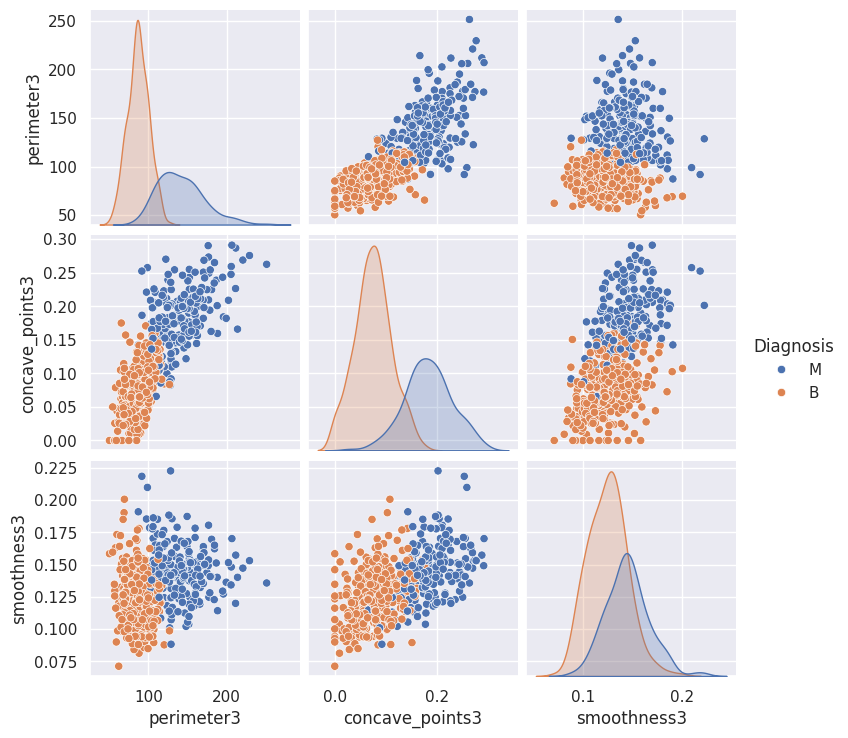

In [23]:
import seaborn as sns
sns.set()
sns.pairplot(df, hue='Diagnosis',vars=["perimeter3", "concave_points3", "smoothness3"])

**Observation**: In perimeter3 and concave_points3 the malignant and benign distributions can easily be separated. In smoothness3 that is not the case.

## The Iris Data Set

Here we are building a three way confusion matrix because we have three classification labels.  We apply our grid search to find the best model

In [24]:
# Grid search with cross-validation for iris dataset
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# get data
df = pd.read_csv(home+"iris.csv")
X  = df.drop(columns=['id','Species'])
y = df[['Species']]

# setting up grid search
model = model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini', 'log_loss']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search
grid.fit(X,y)

# print out best parameters
print("Best parameters: {}".format(grid.best_params_))

# print out the best model
print("Best tree:")
tree_print(grid.best_estimator_,X)

# compute the accuracy of the best model
predict_y = grid.best_estimator_.predict(X)
acc = accuracy_score(y, predict_y)

# print accuracy of best model
print("Accuracy of best model: {:3.2f}".format(acc))

# build and print the confusion matrix
labels = ['setosa','versicolor','virginica']
cm = confusion_matrix(y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Best parameters: {'criterion': 'gini', 'max_depth': 4}
Best tree:
if Petal.Width =< 0.800000011920929: 
  |then setosa
  |else if Petal.Width =< 1.75: 
  |  |then if Petal.Length =< 4.950000047683716: 
  |  |  |then if Petal.Width =< 1.6500000357627869: 
  |  |  |  |then versicolor
  |  |  |  |else virginica
  |  |  |else if Petal.Width =< 1.550000011920929: 
  |  |  |  |then virginica
  |  |  |  |else versicolor
  |  |else if Petal.Length =< 4.8500001430511475: 
  |  |  |then if Sepal.Length =< 5.950000047683716: 
  |  |  |  |then versicolor
  |  |  |  |else virginica
  |  |  |else virginica
<---------->
Tree Depth:  4
Accuracy of best model: 0.99
Confusion Matrix:
            setosa  versicolor  virginica
setosa          50           0          0
versicolor       0          50          0
virginica        0           1         49


In [25]:
y.value_counts()

Species   
setosa        50
versicolor    50
virginica     50
dtype: int64

Scatter plot with the two top features from the decision tree.

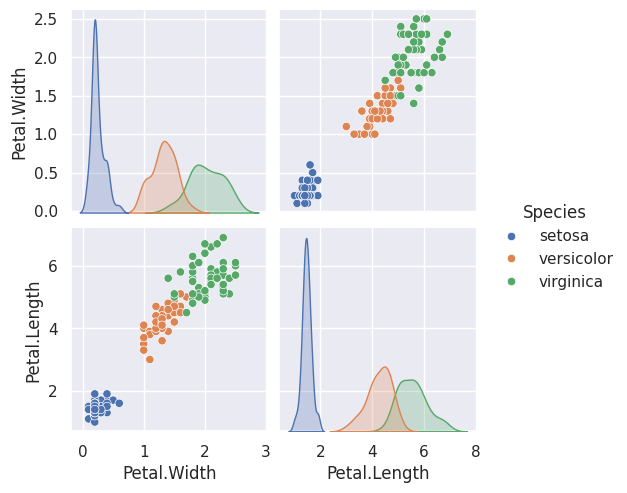

In [26]:
import seaborn as sns
sns.set()
sns.pairplot(df, hue='Species', vars=["Petal.Width", "Petal.Length"])

# Reading

[Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)

# Midterm

Please refer to the midterm BrightSpace page.